In [47]:
import seaborn as sns
import pandas as pd
import numpy as np


In [48]:
df=sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
df['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
df['species']=df['species'].map({'versicolor':0,'virginica':1,'setosa':2})


In [53]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [54]:
### Split dataset into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [55]:
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
y


0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=420)


In [58]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()


In [59]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}


In [60]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=6)


In [61]:
classifier_regressor.fit(X_train,y_train)


/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [62]:
print(classifier_regressor.best_params_)


{'C': 30, 'max_iter': 100, 'penalty': 'l2'}


In [63]:
print(classifier_regressor.best_score_)


1.0


In [64]:
##prediction
y_pred=classifier_regressor.predict(X_test)


In [65]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report


In [66]:
score=accuracy_score(y_pred,y_test)
print(score)


0.9333333333333333


In [67]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.77      0.87        13
           2       1.00      1.00      1.00        15

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.93        45
weighted avg       0.94      0.93      0.93        45



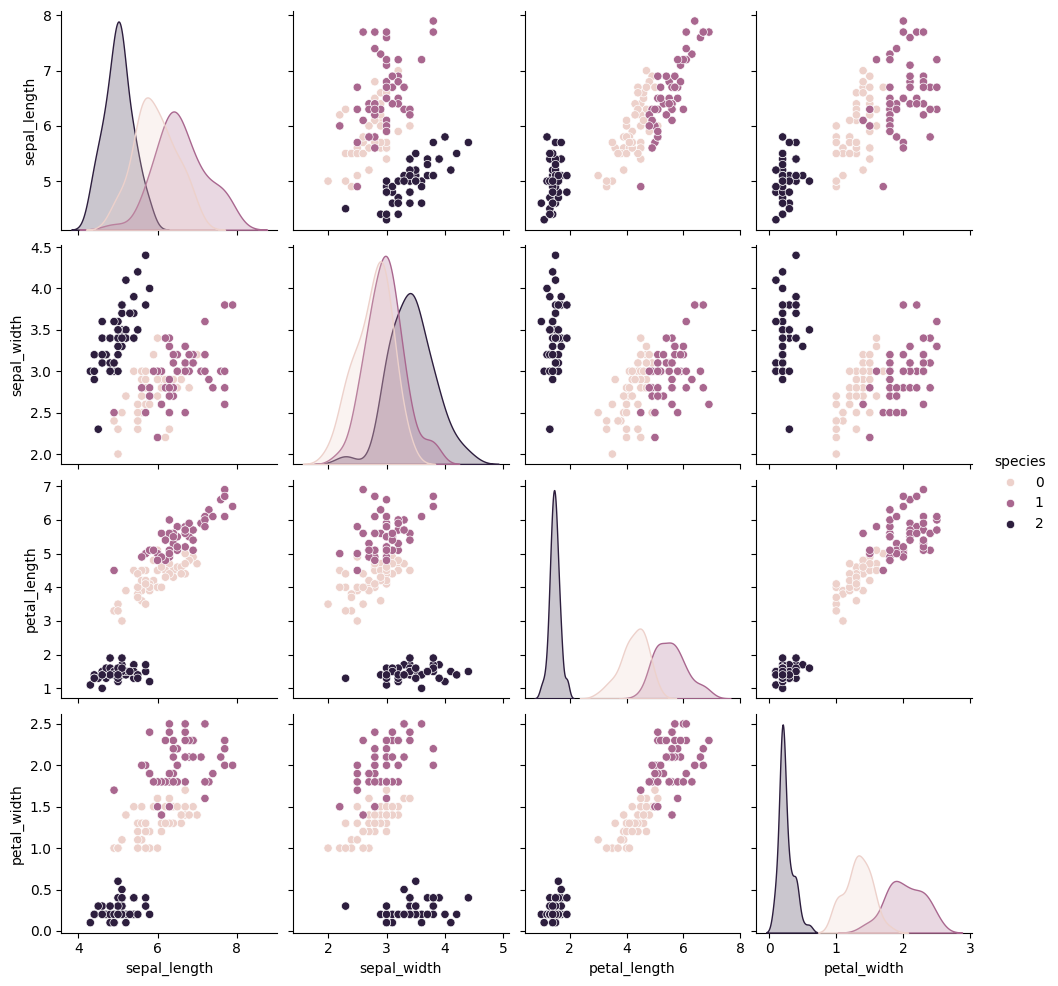

In [68]:
##EDA
sns.pairplot(df,hue='species')


In [69]:
df.corr()


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.460039
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.618372
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.649242
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.580377
species,-0.460039,0.618372,-0.649242,-0.580377,1.000000
